In [73]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [101]:
def lipinski_wt_limit(m):
    hodnota = Descriptors.MolWt(m) 
    if hodnota <= 500:
        return hodnota
    else:
        return 0

def lipinski_logp_limit(m):
    hodnota = Descriptors.MolLogP(m)
    if hodnota <= 5:
        return hodnota
    else:
        return 0

def lipinski_hba_limit(m):
    hodnota = rdescriptors.CalcNumLipinskiHBA(m)
    if hodnota <= 10:
        return hodnota
    else:
        return 0

def lipinski_hbd_limit(m):
    hodnota = rdescriptors.CalcNumLipinskiHBD(m)
    if hodnota <= 5:
        return hodnota
    else:
        return 0


False

In [102]:
polePoli = list([lipinski_wt_limit(m), lipinski_logp_limit(m), lipinski_hba_limit(m), lipinski_hbd_limit(m)] for m in drugbank)


In [103]:
X = np.array(polePoli)
X

array([[ 0.00000e+00, -8.11643e+00,  0.00000e+00,  0.00000e+00],
       [ 0.00000e+00, -3.10570e+00,  0.00000e+00,  0.00000e+00],
       [ 0.00000e+00, -4.13203e+00,  0.00000e+00,  0.00000e+00],
       ...,
       [ 0.00000e+00,  1.54710e+00,  0.00000e+00,  0.00000e+00],
       [ 3.30422e+02, -3.00000e-04,  5.00000e+00,  0.00000e+00],
       [ 4.08897e+02,  3.35040e+00,  4.00000e+00,  1.00000e+00]])

In [104]:
pca =PCA(n_components =2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[9.99147527e-01 3.91663731e-04]


In [111]:
scaler = StandardScaler()
scaler.fit(X)
y = scaler.transform(X)

In [112]:
spca =PCA(n_components =4)
spca.fit(y)
ty =spca.transform(y)
print(spca.explained_variance_ratio_)

[0.424573   0.26486062 0.18492666 0.12563971]


In [113]:
principalComponents = pca.fit_transform(y)

In [114]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [115]:
def pca_plot(X, *args, highlights=set()):
    fig = plt.figure()
    ax = plt.subplot(111)
    for i, point in enumerate(X):
        x,y = point
        if i in highlights:
            plt.plot([x],[y],"r.", markersize=4)
        else:
            plt.plot([x],[y],"k.", markersize=1)
    return fig

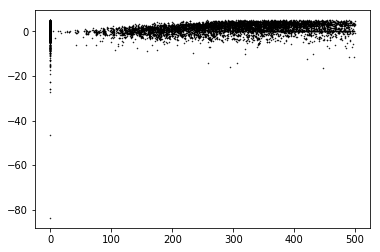

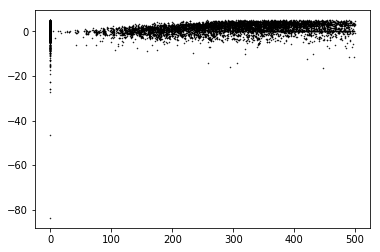

In [116]:
pca_plot(X[:,0:2])